In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Random Forest Machine Learning Model

In [ ]:
# Load your dataset into a pandas DataFrame (assuming you have a 'data' DataFrame)

# ------------------------------- ATTEMPT 1 -------------------------------
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset.csv'
df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date).csv'
# -------------------------------------------------------------------------

# ------------------------------- ATTEMPT 2 -------------------------------
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended.csv'
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended (Date).csv'
# -------------------------------------------------------------------------

df = pd.read_csv(df_file_path)

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,2195.533135,20161003,0.148876,0.132700,0.113312,0.103507,0.300521,0.170895,0.102205,0.113339,0.001579,293.519165,290.842529,2720.0,22.89,0.487626,0.531719,0.326894,0.116562,-0.452379
1,4261.502792,20161010,0.121413,0.100615,0.087605,0.074336,0.252893,0.142067,0.081778,0.082153,0.000923,299.937988,298.319611,2720.0,40.73,0.545663,0.472723,0.323774,0.216369,-0.485429
2,3855.475241,20161019,0.124823,0.103816,0.087938,0.070045,0.265555,0.137159,0.074076,0.079694,0.001435,294.045776,292.960663,2720.0,0.15,0.582568,0.538769,0.350963,0.330327,-0.502462
3,3410.497451,20161026,0.119692,0.096548,0.078429,0.061975,0.217233,0.110441,0.059190,0.070842,0.000960,295.659698,293.916382,2720.0,4.15,0.556065,0.448735,0.298876,0.375183,-0.469467
4,1977.656382,20161104,0.171797,0.148716,0.129624,0.112679,0.311990,0.172616,0.107599,0.122055,0.029218,284.465698,282.250305,6848.0,11.01,0.469332,0.570964,0.323322,0.181057,-0.412955


In [ ]:
# Date Variable Testing

# ---------------------------------------------------------------------- Epoch ----------------------------------------------------------------------
# def df_epoch(df):
#   df_epoch = df

#   # Date was converted to Epoch (numeric representation)
#   df_epoch['Date'] = pd.to_datetime(df_epoch['Date'], format='%Y%m%d')
#   df_epoch['Date Epoch'] = df_epoch['Date'].astype(int) // 10**9  # Convert to seconds since epoch
#   df_epoch = df_epoch.drop('Date', axis=1)

#   return df_epoch

# df = df_epoch(df)
# ----------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------- Epoch, Year, Month & Day -------------------------------------------------------------
def df_epoch_and(df):
  df_epoch_and = df
  df_epoch_and['Date'] = pd.to_datetime(df_epoch_and['Date'], format='%Y%m%d')
  df_epoch_and['Date Epoch'] = df_epoch_and['Date'].astype(int) // 10**9  # Convert to seconds since epoch

  df_epoch_and['Year'] = df_epoch_and['Date'].dt.year
  df_epoch_and['Month'] = df_epoch_and['Date'].dt.month
  df_epoch_and['Day'] = df_epoch_and['Date'].dt.day
  df_epoch_and = df_epoch_and.drop('Date', axis=1)

  return df_epoch_and

df = df_epoch_and(df)
# ----------------------------------------------------------------------------------------------------------------------------------------------------

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,2195.533135,20161003,0.148876,0.132700,0.113312,0.103507,0.300521,0.170895,0.102205,0.113339,0.001579,293.519165,290.842529,2720.0,22.89,0.487626,0.531719,0.326894,0.116562,-0.452379
1,4261.502792,20161010,0.121413,0.100615,0.087605,0.074336,0.252893,0.142067,0.081778,0.082153,0.000923,299.937988,298.319611,2720.0,40.73,0.545663,0.472723,0.323774,0.216369,-0.485429
2,3855.475241,20161019,0.124823,0.103816,0.087938,0.070045,0.265555,0.137159,0.074076,0.079694,0.001435,294.045776,292.960663,2720.0,0.15,0.582568,0.538769,0.350963,0.330327,-0.502462
3,3410.497451,20161026,0.119692,0.096548,0.078429,0.061975,0.217233,0.110441,0.059190,0.070842,0.000960,295.659698,293.916382,2720.0,4.15,0.556065,0.448735,0.298876,0.375183,-0.469467
4,1977.656382,20161104,0.171797,0.148716,0.129624,0.112679,0.311990,0.172616,0.107599,0.122055,0.029218,284.465698,282.250305,6848.0,11.01,0.469332,0.570964,0.323322,0.181057,-0.412955


In [ ]:
# Normalize columns (except LE)
scaler = MinMaxScaler()

# ----------- Without Date -----------
# df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
# ------------------------------------

# ------------- With Date ------------
# df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
# ------------------------------------

# ---------- Date Variation ----------
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])     # Same as the Without Date method
# ------------------------------------

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,2195.533135,20161003,0.078557,0.081724,0.085695,0.090006,0.304729,0.273736,0.177279,0.092751,0.003263,0.692846,0.665004,0.000000,0.2289,0.585918,0.496473,0.487240,0.020266,0.327740
1,4261.502792,20161010,0.043495,0.041486,0.052787,0.054665,0.249645,0.224289,0.140258,0.053525,0.001421,0.756584,0.743895,0.000000,0.4073,0.654769,0.441732,0.482620,0.020689,0.291535
2,3855.475241,20161019,0.047850,0.045501,0.053213,0.049466,0.264290,0.215872,0.126298,0.050432,0.002860,0.698075,0.687353,0.000000,0.0015,0.698551,0.503015,0.522872,0.021172,0.272876
3,3410.497451,20161026,0.041299,0.036386,0.041040,0.039688,0.208403,0.170044,0.099319,0.039298,0.001526,0.714101,0.697437,0.000000,0.0415,0.667110,0.419474,0.445760,0.021362,0.309021
4,1977.656382,20161104,0.107822,0.101810,0.106577,0.101119,0.317993,0.276687,0.187056,0.103713,0.080905,0.602946,0.574348,0.941606,0.1101,0.564216,0.532888,0.481952,0.020540,0.370929


In [ ]:
# Split the dataset into train, validation, and test sets (using the same splits)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
# Calculate the mean of the 'Daily LE' column
mean_daily_le = train_data['Daily LE'].mean()

In [ ]:
# Prepare the data for training
X_train = train_data.iloc[:, 1:]
y_train = train_data['Daily LE']

X_val = val_data.iloc[:, 1:]
y_val = val_data['Daily LE']

X_test = test_data.iloc[:, 1:]
y_test = test_data['Daily LE']

In [ ]:
# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test R-squared: {test_r2}")

# Calculate normalized performance metrics
normalized_test_mse = test_mse / mean_daily_le
normalized_test_mae = test_mae / mean_daily_le

print(f"Normalized Test Mean Squared Error: {normalized_test_mse * 100}%")
print(f"Normalized Test Mean Absolute Error: {normalized_test_mae * 100}%")

Test Mean Squared Error: 1555617.5847135237
Test Mean Absolute Error: 790.8789138457954
Test R-squared: 0.7927367524598697
Normalized Test Mean Squared Error: 45385.64136081041%
Normalized Test Mean Absolute Error: 23.074145661732633%


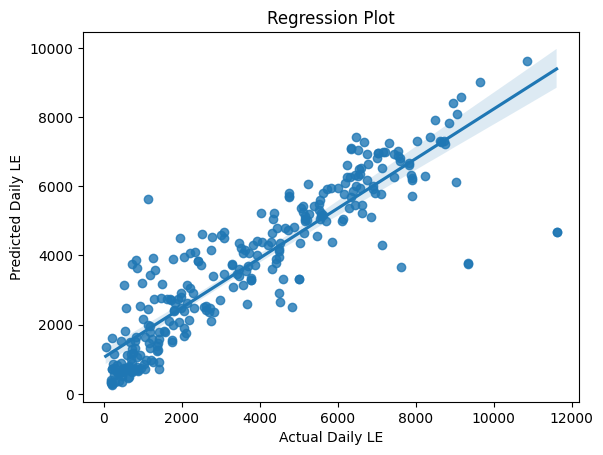

In [ ]:
# Plot a regression plot
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Daily LE')
plt.ylabel('Predicted Daily LE')
plt.title('Regression Plot')
plt.show()

# South African Application

In [ ]:
sa_df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Flux Tower Data/South African Flux Data/CathedralPeak ML.csv'
sa_df = pd.read_csv(sa_df_file_path)

sa_df.head()
# sa_df.info()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,132.825220,20190327,0.186536,0.188459,0.251563,0.343273,0.452146,0.560825,0.476833,0.282798,0.002142,306.489716,305.716888,2720,0.0,0.136876,0.129714,0.126067,-0.225677,-0.285037
1,2099.126381,20190412,0.184809,0.188851,0.256593,0.348240,0.452815,0.571214,0.498810,0.285940,0.007279,303.902588,304.215973,2720,0.0,0.130547,0.122979,0.120566,-0.220315,-0.276600
2,2771.311619,20190428,0.193005,0.196031,0.255942,0.342640,0.448484,0.567909,0.480659,0.282795,0.002407,310.842468,309.994202,2720,0.0,0.133789,0.130087,0.122967,-0.215371,-0.273331
3,2235.486077,20190514,0.187031,0.191243,0.254905,0.344078,0.449928,0.573298,0.494558,0.284608,0.002549,316.358459,315.193512,2720,0.0,0.133312,0.127219,0.122701,-0.218702,-0.276695
4,1231.563918,20190530,0.191349,0.194882,0.257152,0.344946,0.450556,0.569357,0.478308,0.286895,0.002141,310.687683,309.963379,2720,1.8,0.132759,0.128254,0.122281,-0.215597,-0.273283


In [ ]:
sa_df_epoch_and = df_epoch_and(sa_df)

# sa_df_epoch_and.head()
# sa_df_epoch_and.info()

In [ ]:
# Ensure that the prediction df is prepared in the same way as the original df (i.e normalised)

sa_df_epoch_and.iloc[:, 1:] = scaler.fit_transform(sa_df_epoch_and.iloc[:, 1:])
predcit_data = sa_df_epoch_and
# sa_df_epoch_and.head()

In [ ]:
# Ensure that the prediction code is prepared in the same way as the train, val and test data

X_predict = predcit_data.iloc[:, 1:]
y_predict = predcit_data['Daily LE']

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_predict)
print(y_pred)

[4572.87008858 4288.1582722  4253.97849636 5195.52415598 5281.08627981
 4533.83740157 5772.37364429 5669.62449576 4523.68410456 5849.26356215
 4345.06911772 5375.5582952  3974.6359789  3163.16505473 3429.82158036
 3386.18901901 3252.55633988 2340.7517085  3407.36291018 3589.75857511
 2456.84065471 3909.8264224  3276.14488137 3999.7111025  4359.54953041
 4472.22449723 5265.81078785 5731.97506905 5685.44227331 5870.8900159
 5750.66674781 5955.01664902 5888.50204227 5362.3541375  5302.56966636
 3463.25989278 3880.28228238 2157.69582278 2283.358135   2009.36105825
 2812.2821774  2768.44906395 3032.72220462 3097.53584765 4267.30773698
 4782.2785363  5722.06597142 5243.59023457 5797.50193829 5715.76411185
 5943.91484928 5814.78652634 6061.69136826 5912.7087083  5760.25624068
 4899.29525791 3242.05336902 2950.20203407 2246.09214618 2742.98314003
 2292.3212687  2191.64337463]


In [ ]:
# Calculate the mean of the 'Daily LE' column
mean_daily_le = predcit_data['Daily LE'].mean()

# Evaluate the model
test_mse = mean_squared_error(y_predict, y_pred)
test_mae = mean_absolute_error(y_predict, y_pred)
test_r2 = r2_score(y_predict, y_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test R-squared: {test_r2}")

# Calculate normalized performance metrics
normalized_test_mse = test_mse / mean_daily_le
normalized_test_mae = test_mae / mean_daily_le

print(f"Normalized Test Mean Squared Error: {normalized_test_mse * 100}%")
print(f"Normalized Test Mean Absolute Error: {normalized_test_mae * 100}%")

Test Mean Squared Error: 29743066.488962024
Test Mean Absolute Error: 3848.062485215775
Test R-squared: -0.5060892970256223
Normalized Test Mean Squared Error: 1388964.3299834616%
Normalized Test Mean Absolute Error: 179.69974728381638%


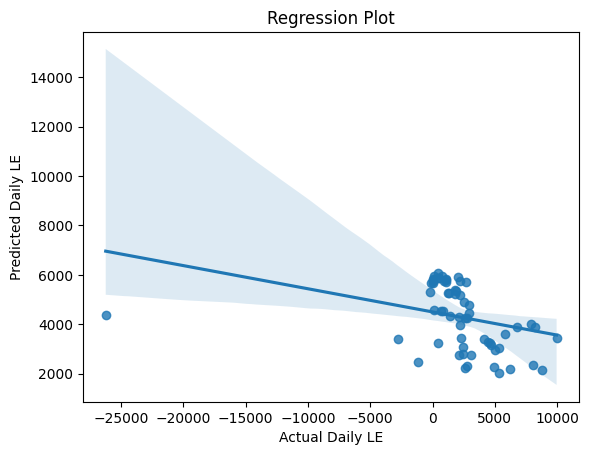

In [ ]:
# Plot a regression plot
sns.regplot(x=y_predict, y=y_pred)
plt.xlabel('Actual Daily LE')
plt.ylabel('Predicted Daily LE')
plt.title('Regression Plot')
plt.show()